**Installing Filesystem Interface**

In [ ]:
pip install fsspec

     |████████████████████████████████| 92kB 5.0MB/s 


**Uploading files**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 0708.csv to 0708.csv
Saving 0809.csv to 0809.csv
Saving 0910.csv to 0910.csv
Saving 1011.csv to 1011.csv
Saving 1112.csv to 1112.csv
Saving 1213.csv to 1213.csv
Saving 1314.csv to 1314.csv
Saving 1415.csv to 1415.csv
Saving 1516.csv to 1516.csv
Saving 1617.csv to 1617.csv
Saving 1718.csv to 1718.csv
Saving 1819.csv to 1819.csv
Saving 1920.csv to 1920.csv
Saving example.csv to example.csv
Saving temp.csv to temp.csv


**Importing Libraries**

In [95]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

**Loading .csv files to dataframes**

In [3]:
s1 = pd.read_csv("0708.csv")
s2 = pd.read_csv("0809.csv")
s3 = pd.read_csv("0910.csv")
s4 = pd.read_csv("1011.csv")
s5 = pd.read_csv("1112.csv")
s6 = pd.read_csv("1213.csv")
s7 = pd.read_csv("1314.csv")
s8 = pd.read_csv("1415.csv")
s9 = pd.read_csv("1516.csv")
s10 = pd.read_csv("1617.csv")
s11 = pd.read_csv("1718.csv")
s12 = pd.read_csv("1819.csv")
s13 = pd.read_csv("1920.csv")
example = pd.read_csv("example.csv")
temp = pd.read_csv("temp.csv")

**Preprocessing**

Checking the dates of first and last matches

In [ ]:
s = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13]
for s in s:
  print(s['Date'].iloc[[0,-1]])
  print("-"*30)

Legend(abbrev.)

In [ ]:
#print(len(example.columns))
s_col = list(s1.columns)
e_col = list(example.columns)
for i in range(0,23):
  print(s_col[i],"\t:",e_col[i])

Div 	: Div
Date 	: Date
HomeTeam 	: HomeTeam
AwayTeam 	: AwayTeam
FTHG 	: Full time home goals
FTAG 	: Full time away goals
FTR 	: Full time result
HTHG 	: Half time home goals
HTAG 	: Half time away goals
HTR 	: Half time result
Referee 	: Referee
HS 	: Home shots
AS 	: Away shots
HST 	: Home shots on target
AST 	: Away shots on target
HF 	: Home fouls
AF 	: Away fouls
HC 	: Home corners
AC 	: Away corners
HY 	: Home yellows
AY 	: Away yellows
HR 	: Home reds
AR 	: Away reds


Checking for null values

In [ ]:
count = 1
s = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13]
for s in s:
  if s.isnull().values.any() == True:
    print("-"*50)
    print("Season",count,"\t:True")
    for col in s.columns:
      if s[col].isnull().values.any() == True:
        print(col,":",s[col].count())
  count+=1
print("-"*50)

Converting all dates to YYYY format

In [4]:
s = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13]
for s in s:
  for i in range(len(s.Date)):
    d,m,yr = s.Date.iloc[i].split('/')
    y = int(yr)
    if len(yr)==2:
      y+=2000
    s.Date.iloc[i] = d+'/'+m+'/'+str(y)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Function to parse date using strptime()

In [5]:
def parse_date(d):
  if d=='':
    return None
  else:
    return dt.strptime(d,'%d/%m/%Y').date()

Parsing all the dates

In [6]:
from datetime import datetime as dt
s = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13]

for s in s:
  s.Date = s.Date.apply(parse_date)

In [7]:
for i in range(len(temp.Date)):
    d,m,yr = temp.Date.iloc[i].split('/')
    y = int(yr)
    if len(yr)==2:
      y+=2000
    temp.Date.iloc[i] = d+'/'+m+'/'+str(y)

temp.Date = temp.Date.apply(parse_date)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Functions to calculate home and away team stats

In [37]:
def home_stats(season, team):
  temp_df = season[season['HomeTeam']==team]

  temp_df['AvgGoalScored_Home'] = ''
  temp_df['AvgGoalConceded_Home'] = ''
  temp_df['AvgShots_Home'] = ''
  temp_df['AvgShotsAgainst_Home'] = ''
  temp_df['AvgShotsOnTarget_Home'] = ''
  temp_df['AvgShotsOnTargetAgainst_Home'] = ''

  for i in range(len(temp_df)):
    h_gs, h_gc, h_shots, h_shots_against, h_on_target, h_on_target_against = [], [], [], [], [], []
    if i==0:
      temp_df['AvgGoalScored_Home'].iloc[0] = 0.00
      temp_df['AvgGoalConceded_Home'].iloc[0] = 0.00
      temp_df['AvgShots_Home'].iloc[0] = 0.00
      temp_df['AvgShotsAgainst_Home'].iloc[0] = 0.00
      temp_df['AvgShotsOnTarget_Home'].iloc[0] = 0.00
      temp_df['AvgShotsOnTargetAgainst_Home'].iloc[0] = 0.00
    else:
      for j in range(len(temp_df)):
        if temp_df['Date'].iloc[i]>temp_df['Date'].iloc[j]:
          h_gs.append(temp_df['FTHG'].iloc[j])
          h_gc.append(temp_df['FTAG'].iloc[j])
          h_shots.append(temp_df['HS'].iloc[j])
          h_shots_against.append(temp_df['AS'].iloc[j])
          h_on_target.append(temp_df['HST'].iloc[j])
          h_on_target_against.append(temp_df['AST'].iloc[j])
          
        else:
          break
      
      temp_df['AvgGoalScored_Home'].iloc[i] = np.around(np.mean(h_gs),2)
      temp_df['AvgGoalConceded_Home'].iloc[i] = np.around(np.mean(h_gc),2)
      temp_df['AvgShots_Home'].iloc[i] = np.around(np.mean(h_shots),2)
      temp_df['AvgShotsAgainst_Home'].iloc[i] = np.around(np.mean(h_shots_against),2)
      temp_df['AvgShotsOnTarget_Home'].iloc[i] = np.around(np.mean(h_on_target),2)
      temp_df['AvgShotsOnTargetAgainst_Home'].iloc[i] = np.around(np.mean(h_on_target_against),2)
  
  
    
  season_stats = temp_df[['Date','HomeTeam','AwayTeam','FTR','HTR','FTHG','FTAG','AvgGoalScored_Home','AvgGoalConceded_Home','HTHG','HTAG','HS','AS','AvgShots_Home',
                          'AvgShotsAgainst_Home','HST','AST','AvgShotsOnTarget_Home','AvgShotsOnTargetAgainst_Home','HF','AF','HC','AC','HY','AY','HR','AR']]
  return season_stats

In [38]:
def away_stats(season, team):
  temp_df = season[season['AwayTeam']==team]

  temp_df['AvgGoalScored_Away'] = ''
  temp_df['AvgGoalConceded_Away'] = ''
  temp_df['AvgShots_Away'] = ''
  temp_df['AvgShotsAgainst_Away'] = ''
  temp_df['AvgShotsOnTarget_Away'] = ''
  temp_df['AvgShotsOnTargetAgainst_Away'] = ''

  for i in range(len(temp_df)):
    a_gs, a_gc, a_shots, a_shots_against, a_on_target, a_on_target_against = [], [], [], [], [], []
    if i==0:
      temp_df['AvgGoalScored_Away'].iloc[0] = 0.00
      temp_df['AvgGoalConceded_Away'].iloc[0] = 0.00
      temp_df['AvgShots_Away'].iloc[0] = 0.00
      temp_df['AvgShotsAgainst_Away'].iloc[0] = 0.00
      temp_df['AvgShotsOnTarget_Away'].iloc[0] = 0.00
      temp_df['AvgShotsOnTargetAgainst_Away'].iloc[0] = 0.00
    else:
      for j in range(len(temp_df)):
        if temp_df['Date'].iloc[i]>temp_df['Date'].iloc[j]:
          a_gs.append(temp_df['FTAG'].iloc[j])
          a_gc.append(temp_df['FTHG'].iloc[j])
          a_shots.append(temp_df['AS'].iloc[j])
          a_shots_against.append(temp_df['HS'].iloc[j])
          a_on_target.append(temp_df['AST'].iloc[j])
          a_on_target_against.append(temp_df['HST'].iloc[j])
          
        else:
          break
      
      temp_df['AvgGoalScored_Away'].iloc[i] = np.around(np.mean(a_gs),2)
      temp_df['AvgGoalConceded_Away'].iloc[i] = np.around(np.mean(a_gc),2)
      temp_df['AvgShots_Away'].iloc[i] = np.around(np.mean(a_shots),2)
      temp_df['AvgShotsAgainst_Away'].iloc[i] = np.around(np.mean(a_shots_against),2)
      temp_df['AvgShotsOnTarget_Away'].iloc[i] = np.around(np.mean(a_on_target),2)
      temp_df['AvgShotsOnTargetAgainst_Away'].iloc[i] = np.around(np.mean(a_on_target_against),2)
  
  
    
  season_stats = temp_df[['Date','HomeTeam','AwayTeam','FTR','HTR','FTHG','FTAG','AvgGoalScored_Away','AvgGoalConceded_Away','HTHG','HTAG','HS','AS','AvgShots_Away',
                          'AvgShotsAgainst_Away','HST','AST','AvgShotsOnTarget_Away','AvgShotsOnTargetAgainst_Away','HF','AF','HC','AC','HY','AY','HR','AR']]
  return season_stats

In [ ]:
#season_df = temp_df[['Date','HomeTeam','AwayTeam','FTR','HTR','FTHG','FTAG','AvgGoalScored_Home','AvgGoalConceded_Home','AvgGoalScored_Away','AvgGoalConceded_Away','HTHG','HTAG',
#                       'HS','AS','AvgShots_Home','AvgShotsAgainst_Home','AvgShots_Away','AvgShotsAgainst_Away','HST','AST','AvgShotsOnTarget_Home','AvgShotsOnTargetAgainst_Home',
#                       'AvgShotsOnTarget_Away','AvgShotsOnTargetAgainst_Away','HF','AF','HC','AC','HY','AY','HR','AR']]

Final dataset

In [ ]:
# s = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13]
# season_07_19_home = pd.DataFrame()
# season_07_19_away = pd.DataFrame()
# final_season_home = pd.DataFrame()
# final_season_away = pd.DataFrame()
# for idx,season in enumerate(s):
#   team_list = season.HomeTeam.unique().tolist()
#   h_stats = pd.DataFrame()
#   a_stats = pd.DataFrame()
#   for team in team_list:
#     h_stats = h_stats.append(home_stats(season, team))
#     a_stats = a_stats.append(away_stats(season, team))
#     h_stats = h_stats.sort_index()
#     a_stats = a_stats.sort_index()
#     if idx==12:
#       final_season_home = final_season_home.append(h_stats)
#       final_season_away = final_season_away.append(a_stats)
#     else:
#       season_07_19_home = season_07_19_home.append(h_stats)
#       season_07_19_away = season_07_19_away.append(a_stats)

# season_07_19_home = season_07_19_home.sort_index()
# season_07_19_away = season_07_19_away.sort_index()
# final_season_home = final_season_home.sort_index()
# final_season_away = final_season_away.sort_index()
# season_07_19 = pd.merge(season_07_19_home, season_07_19_away, how='inner')
# final_season = pd.merge(final_season_home, final_season_away, how='inner')

In [74]:
s = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13]
season_07_19 = pd.DataFrame()
# season_07_19_away = pd.DataFrame()
final_season = pd.DataFrame()
# final_season_away = pd.DataFrame()

for idx,season in enumerate(s):
  team_list = season.HomeTeam.unique().tolist()
  h_stats = pd.DataFrame()
  a_stats = pd.DataFrame()
  for team in team_list:
    h_stats = h_stats.append(home_stats(season, team))
    a_stats = a_stats.append(away_stats(season, team))
  all_stats = pd.merge(h_stats, a_stats, how='inner')
  if idx==12:
    final_season = final_season.append(all_stats)
    # final_season_away = final_season_away.append(a_stats)
  else:
    season_07_19 = season_07_19.append(all_stats)
    # season_07_19_away = season_07_19_away.append(a_stats)

# season_07_19_home = season_07_19_home.sort_index()
# season_07_19_away = season_07_19_away.sort_index()
# final_season_home = final_season_home.sort_index()
# final_season_away = final_season_away.sort_index()
# season_07_19 = pd.merge(season_07_19_home, season_07_19_away, how='inner')
# final_season = pd.merge(final_season_home, final_season_away, how='inner')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [75]:
season_07_19_df = season_07_19[['Date','HomeTeam','AwayTeam','FTR','HTR','FTHG','FTAG','AvgGoalScored_Home','AvgGoalConceded_Home','AvgGoalScored_Away','AvgGoalConceded_Away',
                                'HTHG','HTAG','HS','AS','AvgShots_Home','AvgShotsAgainst_Home','AvgShots_Away','AvgShotsAgainst_Away','HST','AST','AvgShotsOnTarget_Home',
                                'AvgShotsOnTargetAgainst_Home','AvgShotsOnTarget_Away','AvgShotsOnTargetAgainst_Away','HF','AF','HC','AC','HY','AY','HR','AR']]

final_season_df = final_season[['Date','HomeTeam','AwayTeam','FTR','HTR','FTHG','FTAG','AvgGoalScored_Home','AvgGoalConceded_Home','AvgGoalScored_Away','AvgGoalConceded_Away',
                                'HTHG','HTAG','HS','AS','AvgShots_Home','AvgShotsAgainst_Home','AvgShots_Away','AvgShotsAgainst_Away','HST','AST','AvgShotsOnTarget_Home',
                                'AvgShotsOnTargetAgainst_Home','AvgShotsOnTarget_Away','AvgShotsOnTargetAgainst_Away','HF','AF','HC','AC','HY','AY','HR','AR']]



In [77]:
final_season_df

,Date,HomeTeam,AwayTeam,FTR,HTR,FTHG,FTAG,AvgGoalScored_Home,AvgGoalConceded_Home,AvgGoalScored_Away,AvgGoalConceded_Away,HTHG,HTAG,HS,AS,AvgShots_Home,AvgShotsAgainst_Home,AvgShots_Away,AvgShotsAgainst_Away,HST,AST,AvgShotsOnTarget_Home,AvgShotsOnTargetAgainst_Home,AvgShotsOnTarget_Away,AvgShotsOnTargetAgainst_Away,HF,AF,HC,AC,HY,AY,HR,AR
0,2019-08-09,Liverpool,Norwich,H,H,4,1,0,0,0,0,4,0,15,12,0,0,0,0,7,5,0,0,0,0,9,9,11,2,0,2,0,0
1,2019-08-24,Liverpool,Arsenal,H,H,3,1,4,1,1,0,1,0,25,9,15,12,8,9,5,3,7,5,2,2,8,5,6,4,1,1,0,0
2,2019-09-14,Liverpool,Newcastle,H,H,3,1,3.5,1,1,1.5,2,1,21,8,20,10.5,9,16,9,1,6,4,3,5,5,4,10,1,0,0,0,0
3,2019-10-05,Liverpool,Leicester,H,H,2,1,3.33,1,1,1,1,0,18,2,20.33,9.67,10.33,10.67,8,1,7,3,2.67,4.33,9,17,4,6,1,4,0,0
4,2019-10-27,Liverpool,Tottenham,H,A,2,1,3,1,1.25,2.25,0,1,21,11,19.75,7.75,8.75,22.25,13,4,7.25,2.5,4.5,7.75,9,11,8,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2020-03-07,Wolves,Brighton,D,D,0,0,1.5,1.21,1.07,1.79,0,0,11,7,12.71,10.14,12.57,14.71,1,1,3.93,3.93,4.5,5.79,4,7,2,0,1,3,0,0
376,2020-06-24,Wolves,Bournemouth,H,D,1,0,1.4,1.13,0.8,1.73,0,0,10,4,12.6,9.93,10.07,15.4,2,0,3.73,3.73,3.13,5.6,11,11,6,4,3,3,0,0
377,2020-07-04,Wolves,Arsenal,A,A,0,2,1.38,1.06,1.06,1.31,0,1,10,8,12.44,9.56,9.44,14.75,1,5,3.62,3.5,3.19,4.75,6,11,3,5,2,4,0,0
378,2020-07-12,Wolves,Everton,H,H,3,0,1.29,1.12,1.12,1.88,1,0,14,6,12.29,9.47,12.18,12,7,2,3.47,3.59,3.82,4.59,9,9,5,2,0,2,0,0


In [ ]:
#final_season[(final_season['AwayTeam']=='Liverpool')|(final_season['HomeTeam']=='Liverpool')]
#final_season[final_season['HomeTeam']=='Liverpool']

In [85]:
def convert_result(season):
  for idx in range(len(season)):
    Result = season['FTR'].iloc[idx]
    if Result=='H':
      season['Result'].iloc[idx] = 2
    elif Result=='A':
      season['Result'].iloc[idx] = 1
    else:
      season['Result'].iloc[idx] = 0

In [ ]:
season_07_19_df['Result'] = ''
final_season_df['Result'] = ''
convert_result(season_07_19_df)
convert_result(final_season_df)

In [87]:
final_season_df.head(50)

,Date,HomeTeam,AwayTeam,FTR,HTR,FTHG,FTAG,AvgGoalScored_Home,AvgGoalConceded_Home,AvgGoalScored_Away,AvgGoalConceded_Away,HTHG,HTAG,HS,AS,AvgShots_Home,AvgShotsAgainst_Home,AvgShots_Away,AvgShotsAgainst_Away,HST,AST,AvgShotsOnTarget_Home,AvgShotsOnTargetAgainst_Home,AvgShotsOnTarget_Away,AvgShotsOnTargetAgainst_Away,HF,AF,HC,AC,HY,AY,HR,AR,Result
0,2019-08-09,Liverpool,Norwich,H,H,4,1,0,0,0,0,4,0,15,12,0,0,0,0,7,5,0,0,0,0,9,9,11,2,0,2,0,0,2
1,2019-08-24,Liverpool,Arsenal,H,H,3,1,4,1,1,0,1,0,25,9,15,12,8,9,5,3,7,5,2,2,8,5,6,4,1,1,0,0,2
2,2019-09-14,Liverpool,Newcastle,H,H,3,1,3.5,1,1,1.5,2,1,21,8,20,10.5,9,16,9,1,6,4,3,5,5,4,10,1,0,0,0,0,2
3,2019-10-05,Liverpool,Leicester,H,H,2,1,3.33,1,1,1,1,0,18,2,20.33,9.67,10.33,10.67,8,1,7,3,2.67,4.33,9,17,4,6,1,4,0,0,2
4,2019-10-27,Liverpool,Tottenham,H,A,2,1,3,1,1.25,2.25,0,1,21,11,19.75,7.75,8.75,22.25,13,4,7.25,2.5,4.5,7.75,9,11,8,3,3,3,0,0,2
5,2019-11-10,Liverpool,Man City,H,H,3,1,2.8,1,3,1,2,0,12,18,20,8.4,19.8,8.2,5,3,8.4,2.8,8.2,4.6,10,5,4,13,0,2,0,0,2
6,2019-11-30,Liverpool,Brighton,H,H,2,1,2.83,1,0.83,1.83,2,0,15,12,18.67,10,10.17,17.67,7,5,7.83,2.83,2.67,7,3,10,4,5,0,0,1,0,2
7,2019-12-04,Liverpool,Everton,H,H,5,2,2.71,1,0.86,1.71,4,2,11,12,18.14,10.29,13.14,9,5,4,7.71,3.14,3.57,3.86,13,17,5,6,1,2,0,0,2
8,2019-12-14,Liverpool,Watford,H,H,2,0,3,1.12,0.62,2.12,1,0,16,8,17.25,10.5,8.62,13.88,6,2,7.38,3.25,2.75,4.88,8,6,6,3,2,1,0,0,2
9,2019-12-29,Liverpool,Wolves,H,H,1,0,2.89,1,1.44,1.11,1,0,10,10,17.11,10.22,13.22,13.22,3,2,7.22,3.11,4.67,3.56,7,3,5,6,1,0,0,0,2


**ROUGH**

In [ ]:
# final_temp = s1
# teams = final_temp.HomeTeam.unique().tolist()
# print(teams)
# final_h_stats = pd.DataFrame()
# final_a_stats = pd.DataFrame()
# for idx,team in enumerate(teams):
#   final_h_stats = final_h_stats.append(home_stats(final_temp, team))
#   final_a_stats = final_a_stats.append(away_stats(final_temp, team))
  
# final_stats = pd.merge(final_h_stats, final_a_stats, how='inner')
# final_stats

In [ ]:
# final_temp = final_season_df

# for i in range(len(final_temp)):
#   H = final_temp['FTHG'].iloc[i]
#   A = final_temp['FTAG'].iloc[i]
#   Result = final_temp['FTR'].iloc[i]
#   print('-'*10,i,'-'*10)
#   if Result=='H':
#     print("HOME", H, A )
#   elif Result=='A':
#     print("AWAY", H, A)
#   else:
#     print("DRAW", H, A)

**Feature Importance**

In [141]:
train_test_data = season_07_19_df
prediction_data = final_season_df

#X_feature = train_data.drop(['Date','HomeTeam','AwayTeam','FTR','HTR','FTHG','FTAG','HTHG','HTAG'], axis=1)
X_feature = train_test_data[['AvgGoalScored_Home','AvgGoalConceded_Home','AvgGoalScored_Away','AvgGoalConceded_Away','AvgShots_Home','AvgShotsAgainst_Home','AvgShots_Away',
                       'AvgShotsAgainst_Away','AvgShotsOnTarget_Home','AvgShotsOnTargetAgainst_Home','AvgShotsOnTarget_Away','AvgShotsOnTargetAgainst_Away']]
Y_feature = train_test_data['Result']

for col in X_feature.columns:
  X_feature[col] = pd.to_numeric(X_feature[col])

Y_feature = pd.to_numeric(Y_feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Feature Importance - ExtraTreeClassifier

In [142]:
model_etc = ExtraTreesClassifier()
model_etc.fit(X_feature,Y_feature)
features = model_etc.feature_importances_
normalized_features = np.std([tree.feature_importances_ for tree in model_etc.estimators_], axis=0)

<function matplotlib.pyplot.show>

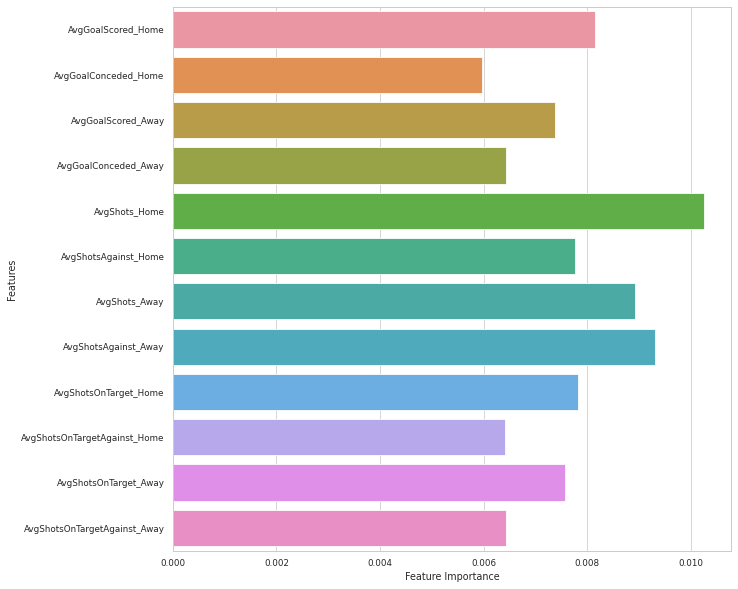

In [143]:
sns.set_context('paper')
sns.set_style('whitegrid')
ax = sns.barplot(x = normalized_features, y = X_feature.columns)
ax.set(xlabel = 'Feature Importance', ylabel = 'Features')
ax.figure.set_size_inches(10,10)
plt.tight_layout
plt.show

Univariate Selection - SelectKBest

,Features,Scores
0,AvgGoalScored_Home,75.586065
4,AvgShots_Home,75.460229
8,AvgShotsOnTarget_Home,73.072901
7,AvgShotsAgainst_Away,66.809618
2,AvgGoalScored_Away,49.115437
3,AvgGoalConceded_Away,47.693273
6,AvgShots_Away,43.338885
11,AvgShotsOnTargetAgainst_Away,41.685326
10,AvgShotsOnTarget_Away,31.547349
1,AvgGoalConceded_Home,29.986625


<function matplotlib.pyplot.show>

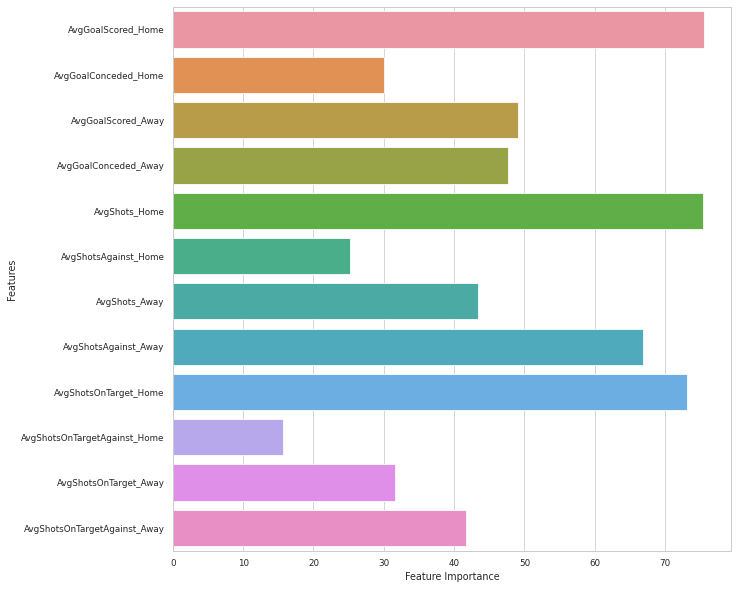

In [144]:
fs = SelectKBest(score_func=f_classif)
fs.fit_transform(X_feature, Y_feature)
# plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
# plt.show()
dffeatures = pd.DataFrame(X_feature.columns)
dfscores = pd.DataFrame(fs.scores_)
KBest_features = pd.concat([dffeatures,dfscores], axis=1)
KBest_features.columns = ['Features', 'Scores']
display(KBest_features.sort_values('Scores', ascending=False))

sns.set_context('paper')
sns.set_style('whitegrid')
ax = sns.barplot(x = fs.scores_, y = X_feature.columns)
ax.set(xlabel = 'Feature Importance', ylabel = 'Features')
ax.figure.set_size_inches(10,10)
plt.tight_layout
plt.show

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_feature, test_size=0.2)

#knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

#confusion_matrix(Y_test, Y_pred)
print(accuracy_score(Y_test, Y_pred)*100)

46.16228070175439


In [137]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_feature, test_size=0.2)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)


51.31578947368421


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
